In [1]:
%matplotlib inline
%display latex

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import theano.tensor as T
import theano_models as tm
import theano_models.deterministic_models as dm
import theano_models.probabilistic_models as pm

In [3]:
x = var("x")

In [17]:
f(x) = x + 0.6*sin(2*pi*(x - 0.5))

In [18]:
def find_all_roots(f, a, b, eps=0.0000000001):
    roots = []
    intervals_to_check = [(a,b)]
    while intervals_to_check:
        start, end = intervals_to_check.pop()
        try:
            root = find_root(f, start, end)
        except RuntimeError:
            continue
        if root in roots:
            continue
        if abs(f(root)) < 1:
            roots.append(root)
        intervals_to_check.extend([(start, root-eps), (root+eps, end)])
    roots.sort()
    return roots

# hist 1D

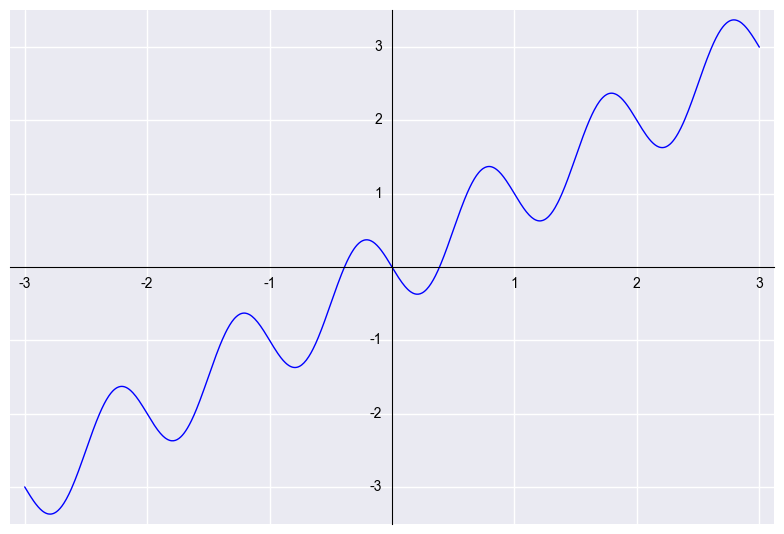

In [19]:
import seaborn
plot(f, (x, -3, 3))

In [20]:
import numpy as np

In [21]:
sample = np.random.normal(loc=f(0).N(), scale=0.07, size=1000)
sample = sample.astype(np.float32)

(array([   7.,   27.,   75.,  185.,  256.,  222.,  156.,   58.,    7.,    7.]),
 array([-0.22514687, -0.17878578, -0.13242468, -0.08606359, -0.03970249,
         0.00665861,  0.0530197 ,  0.0993808 ,  0.14574189,  0.19210299,
         0.23846409]),
 <a list of 10 Patch objects>)

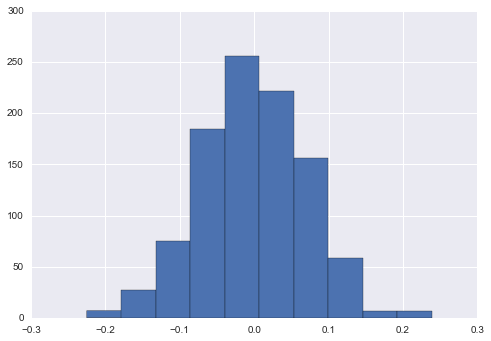

In [22]:
%display default
plt.hist(sample)

Compute true posterior. We need a prior for this.

----

In [ ]:
roots = []
levels = []
for s in sample:
    rs = find_all_roots(f(x)-s, -2, 2)
    ss = [s]*len(rs)
    roots += rs
    levels += ss

In [ ]:
def add_histogram(data, ax=None):
    if ax is None:
        ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="30%", pad=0.15, sharex=ax)
    cax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
    cax.hist(data, bins="auto")

In [ ]:
xaxis = np.linspace(float(-1.1), float(1.1), float(100))
yaxis = np.array([f(x).N() for x in xaxis])

In [ ]:
plt.figure()
plt.plot(xaxis, yaxis, "k")
plt.scatter(roots, levels, s=40, alpha=0.005)
add_histogram(np.array(roots))

In [ ]:
%display default
plt.hist(np.array(roots), bins="auto")

# hist 2d

See "variational lower bound.ipynb"

In [ ]:
preparser(False)

In [ ]:
x = tm.as_tensor_variable([0.0, 0.0]) #T.vector()
# x = tm.as_tensor_variable([0.5, 0.5]) #T.vector()
y = 0.3 * T.sin(2*np.pi*(x[0] - 0.5)) + x[0] + x[1] #+ np.exp(-x[1]**2)
# y = 0.3 * T.sin(2*np.pi*(x[0])) + x[0] + x[1] #+ np.exp(-x[1]**2)
func = tm.Model(inputs=[x], outputs=y, name="sin")
f = func.function()

In [ ]:
@np.vectorize
def myfunc(a,b):
    return f([a,b])

In [ ]:
plt.figure()
# num_x = np.linspace(-0, 1, 100)
num_x = np.linspace(-1.5, 1.5, 100)
# num_x = np.linspace(-0.6, 1.6, 100)
# num_x = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(num_x, num_x)

levels = np.linspace(-3.2, 3.2, 20)
# levels = np.linspace(-1.2, 3.6, 20)
h = plt.contourf(X1, X2, myfunc(X1, X2), cmap=plt.cm.gray, levels=levels)
# l=f([0.5, 0.5])
l=f([0.0, 0.0])
h2 = plt.contour(X1, X2, myfunc(X1, X2), cmap=plt.cm.jet, levels=[l, l+0.001])
plt.xlabel("x1")
plt.ylabel("x2")

plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(h)

In [ ]:
xs = []
ys = []
for _ in xrange(100):
    l = np.random.normal(loc=f([0.0, 0.0]), scale=0.07)
    h2 = plt.contour(X1, X2, myfunc(X1, X2), cmap=plt.cm.jet, levels=[l, l+0.001])
    p = h2.collections[1].get_paths()[0]
    v = p.vertices
    xs += v[:,0].tolist()
    ys += v[:,1].tolist()

In [ ]:
xs_ = np.array(xs)
ys_ = np.array(ys)

In [ ]:
sh = sns.jointplot(x=xs_, y=ys_, stat_func=None, s=40, alpha=0.05, edgecolors="none", zorder=1)
mainax = sh.fig.get_axes()[0]
mainax.contourf(X1, X2, myfunc(X1, X2), cmap=plt.cm.gray, levels=levels, zorder=0) 
l=f([0.0, 0.0])
mainax.contour(X1, X2, myfunc(X1, X2), cmap=plt.cm.jet, levels=[l, l+0.001], zorder=2)
